<a href="https://colab.research.google.com/github/DiabaGodwin/0x01.c/blob/master/Advance_Machine_learning_%26_Deep_Learning_Masterclass_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Working with a single input neuron

inputs = [1.0,2.0,3.0]
weights = [0.2, 0.8, -0.5]
bias = 2.0
output= inputs[0]*weights[0]+inputs[1]*weights[1]+inputs[2]*weights[2]+bias
print(output)

2.3


Working with multiple input neurons

In [ ]:
inputs = [1.0,2.0,3.0,2.5]
weights = [[0.2, 0.8, -0.5,1],
           [0.5,-0.91,0.26,-0.5],
           [-0.26, -0.27,0.17,0.87]]
bias1 = 2.0
bias2 = 3.0
bias3 = 0.5
output = [inputs[0]*weights[0][0]+inputs[1]*weights[0][1]+inputs[2]*weights[0][2]+inputs[3]*weights[0][3]+bias1,
          inputs[0]*weights[1][0]+inputs[1]*weights[1][1]+inputs[2]*weights[1][2]+inputs[3]*weights[1][3]+bias2,
          inputs[0]*weights[2][0]+inputs[1]*weights[2][1]+inputs[2]*weights[2][2]+inputs[3]*weights[2][3]+bias3]
print(output)


[4.8, 1.21, 2.385]


In [ ]:
import pandas as pd
data = pd.read_csv('/content/pima-indians-diabetes.csv')
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


Building neural network model in Keras

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# load the dataset
dataset = loadtxt('/content/pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [ ]:
#define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#fit the model on the dataset
model.fit(X,y, epochs=150, batch_size=10)

Epoch 1/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6265 - loss: 6.4857
Epoch 2/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5581 - loss: 3.3979
Epoch 3/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5999 - loss: 1.4579
Epoch 4/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5945 - loss: 0.9765
Epoch 5/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6264 - loss: 0.8571
Epoch 6/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6367 - loss: 0.7883
Epoch 7/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6772 - loss: 0.7130
Epoch 8/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7035 - loss: 0.7021
Epoch 9/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6910 - loss: 0.6880
Epoch 10/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6771 - loss: 0.6237
Epoch 11/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6886 - loss: 0.6872
Epoch 12/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [ ]:
#evalute the model

_, accuracy = model.evaluate(X,y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7437 - loss: 0.5266 
Accuracy: 75.52


Hadwritten Digit Recognition Project(Hello world project in deeplearning)

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist #mnist dataset of 28x28 images of handwriiten digit and their labels
(x_train, y_train),(x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#A sequestial model is what youre going to use most of the time. It just means things are going to in direct order.
#A food  forward model. No going backwards for now

model = tf.keras.models.Sequential()  #A basic feed forward model
model.add(tf.keras.layers.Flatten())  #takes our 28x28 and make it 1x784


#This layer has 128 units. The activation function is relu, short for rectified linear.
#currently, relu is the activation function you should just default to
# There are many more to test for sure, but if you don't know what to use, use relu to start
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))# A simple fully-connected layer, 128 units, relu activation function
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

#this is our final layer. It has 10 nodes
#1 node  per possible numbeer prediction
#in this case, our activation function  is a softmax, since we'er  really actualy looking for something more like a probability distribution  of which the possible options this thing we're passing features through

model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))  # our output layer. 10 n=units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam'  #good default optimizer to start with
, loss='sparse_categorical_crossentropy', #how will we calculate our "error". Neural network aims at
              metrics=['accuracy']) #what to track

model.fit(x_train, y_train, epochs=3) #train the model
val_loss, val_acc = model.evaluate(x_test,y_test)  #evaluate the out of sample data whit model
print(val_loss)
print(val_acc)

model.save('epic_num_reader.keras')

new_model = tf.keras.models.load_model('epic_num_reader.keras')

prediction = new_model.predict(x_test)
print(prediction)

Corrected code by Gemini

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))  # Use 'relu' instead of tf.nn.relu
model.add(tf.keras.layers.Dense(128, activation='relu'))  # Use 'relu' instead of tf.nn.relu
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Use 'softmax' instead of tf.nn.softmax

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

model.save('epic_num_reader.keras')  # Save with .keras extension

new_model = tf.keras.models.load_model('epic_num_reader.keras')  # Load with .keras extension

predictions = new_model.predict(x_test)
print(predictions)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8604 - loss: 0.4874
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9631 - loss: 0.1228
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9770 - loss: 0.0754
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9619 - loss: 0.1199
0.10657304525375366
0.9678999781608582
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.7602025e-08 4.0404316e-07 2.1164444e-05 ... 9.9992698e-01
  7.6792691e-07 7.0455496e-07]
 [2.2452740e-09 9.3395717e-04 9.9905628e-01 ... 4.0001304e-09
  2.7221520e-06 2.0933243e-13]
 [2.6425639e-07 9.9945080e-01 2.3044435e-05 ... 7.5784374e-05
  3.6019689e-04 4.3593320e-07]
 ...
 [2.6106576e-08 3.5845405e-06 5.2001880e-08 ... 1.9937574e-05
  2.5741232e-04 9.8680416e-03]
 [8.8997473e-07 6.7645074e-06 5.8285474e-09 ... 6.6479252e-08
  8.3018444e-04 3.8827409e-08]
 [4.3595108e-08 4.5010289e-08 1.0180435e-06 ... 2.4762947e-10
  2.5755212e-06 2.1214981e-11]]


9


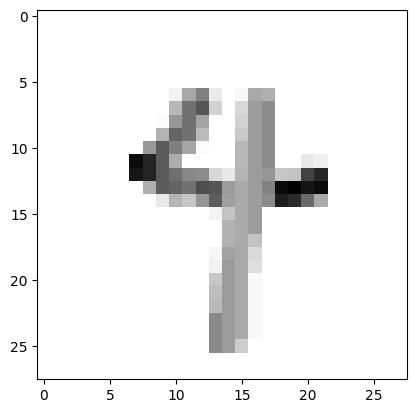

In [ ]:
import numpy as np

print(np.argmax(predictions[565]))
import matplotlib.pyplot as plt
plt.imshow(x_test[565],cmap=plt.cm.binary)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

Naive bayes

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import urllib
import urllib.request as ur
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn import metrics
url='https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
raw_data=ur.urlopen(url)

dataset = np.loadtxt(raw_data, delimiter=',')
print(dataset[0])




[  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.      1.   ]


In [ ]:
X=dataset[:,0:48]
y=dataset[:,-1]


In [ ]:
X_train,x_test,y_train,y_test= train_test_split(X,y,test_size=.33, random_state=17)

In [ ]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train,y_train)
print(BernNB)

BernoulliNB(binarize=True)


In [ ]:
y_expect = y_test
y_pred = BernNB.predict(x_test)
print(metrics.accuracy_score(y_expect,y_pred))

0.8558262014483212


In [ ]:

#this is an example of how the y_expect is compared to y_pred. Checking if the predicted value is equal to the expected value
print(metrics.accuracy_score([1,1,0],[1,0,1]))

0.3333333333333333


Using Multinomial

In [ ]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)

y_pred = MultiNB.predict(x_test)
print(metrics.accuracy_score(y_expect,y_pred))


0.8736010533245556


In [ ]:
# using the Gausian naive bayes
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)

y_pred = GausNB.predict(x_test)
print(metrics.accuracy_score(y_expect,y_pred))


0.8130348913759052


Natural Language processing Session

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize
sample_text = 'Flagging is usually don to draw attention to the log synced. Is used for indicating the local log has been syned to the db'
tokenized_sentence = word_tokenize(sample_text)
for sentence in tokenized_sentence:
  print(sentence)


Flagging
is
usually
don
to
draw
attention
to
the
log
synced
.
Is
used
for
indicating
the
local
log
has
been
syned
to
the
db


In [8]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
words = ['illegal', 'walking','eating']
for wod in words:
  print(ps.stem(wod))

illeg
walk
eat


In [9]:
 nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [10]:
from nltk import pos_tag
sample_text= 'I was walking by the road when i saw the cutest puppy on the other side'

tokenized_word= word_tokenize(sample_text)
tag = pos_tag(tokenized_word)
print(tag)

[('I', 'PRP'), ('was', 'VBD'), ('walking', 'VBG'), ('by', 'IN'), ('the', 'DT'), ('road', 'NN'), ('when', 'WRB'), ('i', 'NN'), ('saw', 'VBD'), ('the', 'DT'), ('cutest', 'JJS'), ('puppy', 'NN'), ('on', 'IN'), ('the', 'DT'), ('other', 'JJ'), ('side', 'NN')]


In [11]:
with open('2001aspaceodyssey.txt','r') as corpora:
  sample_text = corpora.read()

# print(sample_text)


In [13]:
tokenized_doc = sent_tokenize(sample_text)

for sentence in tokenized_doc:
  tokenized_words= word_tokenize(sample_text)
  tag = pos_tag(tokenized_words)
  # print(tag)

KeyboardInterrupt: 

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
# Stop words
from nltk.corpus import stopwords
txt = "Stop words are a cool way of getting rid of words we do not use"
stop_words = set(stopwords.words("english"))
print(stop_words)

tokenized_words = word_tokenize(txt)
filtered_sentence =[]

for word in tokenized_words:
  if word not in stop_words:
    filtered_sentence.append(word)

print(filtered_sentence)


{'it', "wouldn't", 'no', 'she', 'over', 'having', 'him', 'and', "doesn't", 'an', 'with', 'from', 'each', 'more', 'mustn', "won't", 'if', 'up', 'been', 'ours', 'very', 'those', 'off', 'were', 'her', 'itself', 'what', 'once', 'that', 'did', "hasn't", 'hers', 'them', 'needn', 'had', 'the', 'now', 'doing', 'haven', "you'd", "needn't", 'further', "it's", 'i', 'should', 'aren', "you'll", 'this', 'any', 'just', 'both', 'hasn', 'we', 'wasn', "didn't", 'here', 'again', 't', "don't", 'but', 'how', 'not', 'you', 'm', "should've", 's', 'a', 'than', 'y', 'ain', "mustn't", "isn't", 'or', 'during', 'my', 'his', "couldn't", 'couldn', 'there', 'which', 'while', 'then', 'do', 'into', 'be', 'where', 'for', 'such', 'between', 'he', "weren't", 'yours', 'down', 'these', 'most', 'so', 'can', 'theirs', 'didn', 'ma', 'they', 'until', 'nor', 'too', 'being', 'against', 'was', "you're", 'out', 'about', 'their', 'our', "that'll", "shouldn't", "wasn't", 'does', 'other', 'will', 've', 'whom', 'me', 'himself', "you'v

In [2]:
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [22]:
# Named entity Recognition

import nltk
from nltk import pos_tag
from nltk import word_tokenize

txt = "Trump  has won the election in the USA after a long battle with Kamala Haris"
tknized_wrd = word_tokenize(txt)
tag = pos_tag(tknized_wrd)

named_ent = nltk.ne_chunk(tag)
print(named_ent)

(S
  (GPE Trump/NNP)
  has/VBZ
  won/VBN
  the/DT
  election/NN
  in/IN
  the/DT
  (ORGANIZATION USA/NNP)
  after/IN
  a/DT
  long/JJ
  battle/NN
  with/IN
  (PERSON Kamala/NNP Haris/NNP))


Movie reviews

In [2]:
nltk.download('movie_reviews')


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [7]:
import nltk
from nltk.corpus import movie_reviews
import random

#(['this','movies','is','great'], 'pos')

documents = []
for category in movie_reviews.categories():
  for fileid in movie_reviews.fileids(category):
    #  print(fileid)
    # Use movie_reviews.words(fileid) to get words from the file
    review_word_list = list(movie_reviews.words(fileid))
    document = (review_word_list,category)
    documents.append(document)

random.shuffle(documents)

all_words = []
for w in movie_reviews.words():
  all_words.append(w.lower())

# using nltk frequency dist to find the most common words
all_words = nltk.FreqDist(all_words)
# print(all_words.most_common(10)) # Use most_common to get the top 10 words


# Selecting Word Features
word_features =[]
for common_word in all_words.most_common(1000):
  word_features.append(common_word[0])


#Creating a feature extraction
def find_features(feature_doc): #Converts the document into a set for efficient lookup.
  words = set(feature_doc)
  features= {}  #Creates an empty dictionary to store the features.
  for word in word_features:
    is_feature_in_words = word in words
    features[word] = is_feature_in_words
  return features


# print(find_features(movie_reviews.words('neg/cv000_29416.txt')))

featuresets = []
for(review, category) in documents:
  feature = (find_features(review), category)
  featuresets.append(feature)



training_set = featuresets[:100]
test_set = featuresets[900:]


classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Accuracy: ", nltk.classify.accuracy(classifier,test_set))

classifier.show_most_informative_features(15)

Accuracy:  0.6672727272727272
Most Informative Features
                american = True              pos : neg    =      7.3 : 1.0
                    fast = True              neg : pos    =      6.6 : 1.0
                  stupid = True              neg : pos    =      6.6 : 1.0
                       t = False             pos : neg    =      5.8 : 1.0
                   jokes = True              neg : pos    =      5.7 : 1.0
                    mess = True              neg : pos    =      5.7 : 1.0
                    ones = True              neg : pos    =      5.7 : 1.0
                    teen = True              neg : pos    =      5.7 : 1.0
                    lack = True              neg : pos    =      5.5 : 1.0
                   worst = True              neg : pos    =      5.5 : 1.0
                    fans = True              neg : pos    =      4.8 : 1.0
                 neither = True              neg : pos    =      4.8 : 1.0
               situation = True             